In [1]:
from hydrodata import Station
import hydrodata.datasets as hds

lon, lat = -69.32, 45.17
start, end = '2000-01-01', '2010-01-21'

wshed = Station(start, end, coords=(lon, lat))

[ID: 01031500] Downloading upstream tributaries from NLDI >>> finished.
[ID: 01031500] Downloading upstream main from NLDI >>> finished.
[ID: 01031500] Downloading flowlines by ComIDs from NLDI >>> finished.
[ID: 01031500] Watershed: Piscataquis River near Dover-Foxcroft, Maine
               Coordinates: (-69.315, 45.175)
               Altitude: 109 m above NGVD29
               Drainage area: 774 sqkm.


In [2]:
dem = hds.dem_bygeom(wshed.geometry)

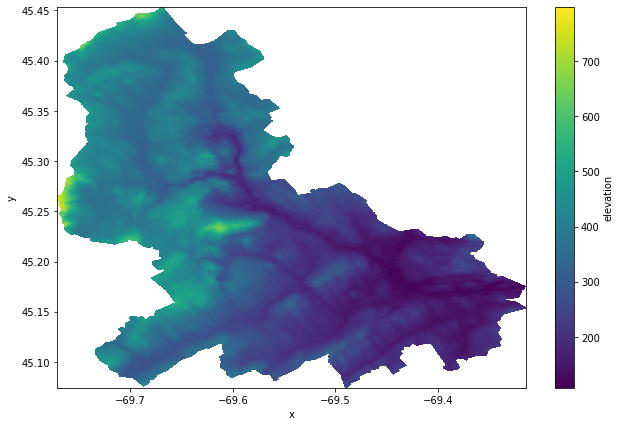

In [3]:
dem.plot(size=7);

In [4]:
clm_loc = hds.deymet_byloc(wshed.lon, wshed.lat, start=wshed.start, end=wshed.end)
clm_loc['Q (cms)'] = hds.nwis(wshed.station_id, wshed.start, wshed.end)

[LOC: (-69.31, 45.17)] Downloading climate data from Daymet >>> finished.
[ID: 01031500] Downloading stream flow data from NWIS >>> finished.


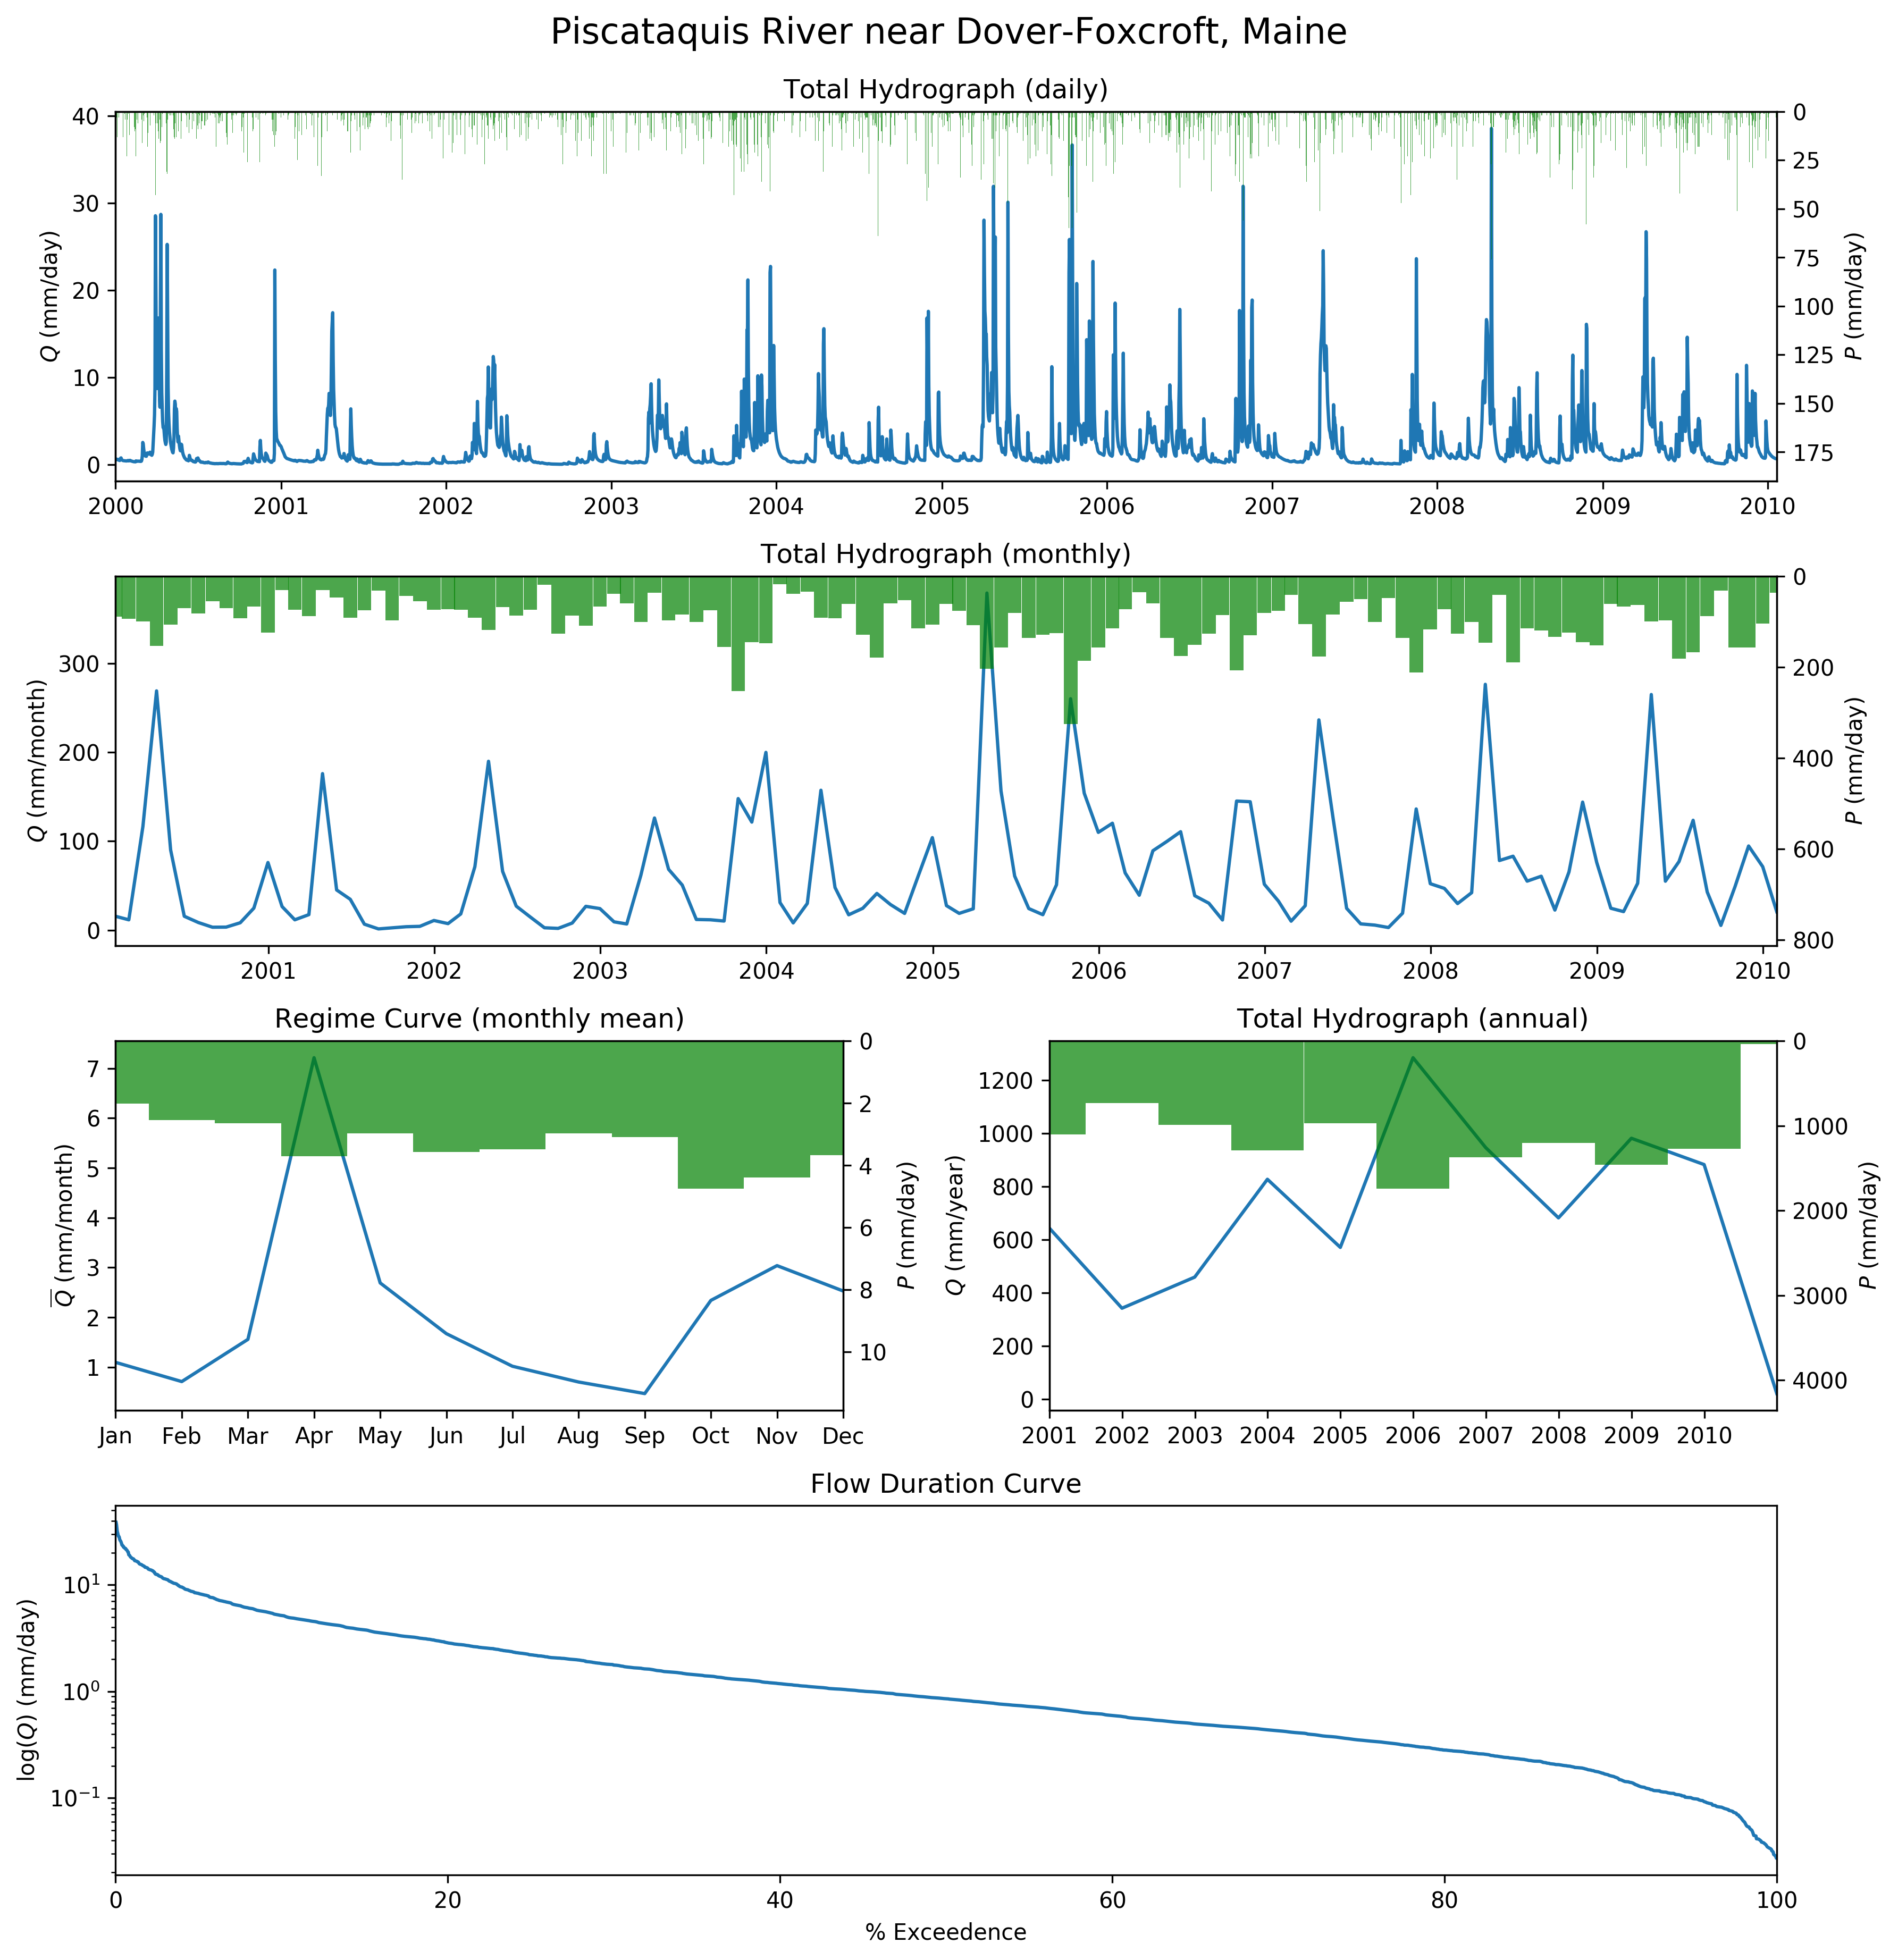

In [5]:
from hydrodata import plot

plot.signatures(clm_loc['Q (cms)'], wshed.drainage_area, prcp=clm_loc['prcp (mm/day)'], title=wshed.name, figsize=(12, 12), output='readme_Q.png')

In [6]:
from hydrodata.datasets import daymet_bygeom

variables = ["tmin", "tmax", "prcp"]
clm_grd = daymet_bygeom(wshed.geometry, start='2005-01-01', end='2005-01-31', variables=variables, pet=True)

[CNT: (-69.58, 45.24)] Downloading climate data from Daymet >>> finished.
[CNT: (-69.58, 45.24)] Computing PET >>> finished.


In [7]:
clm_grd.x.shape[0], clm_grd.y.shape[0]

(40, 37)

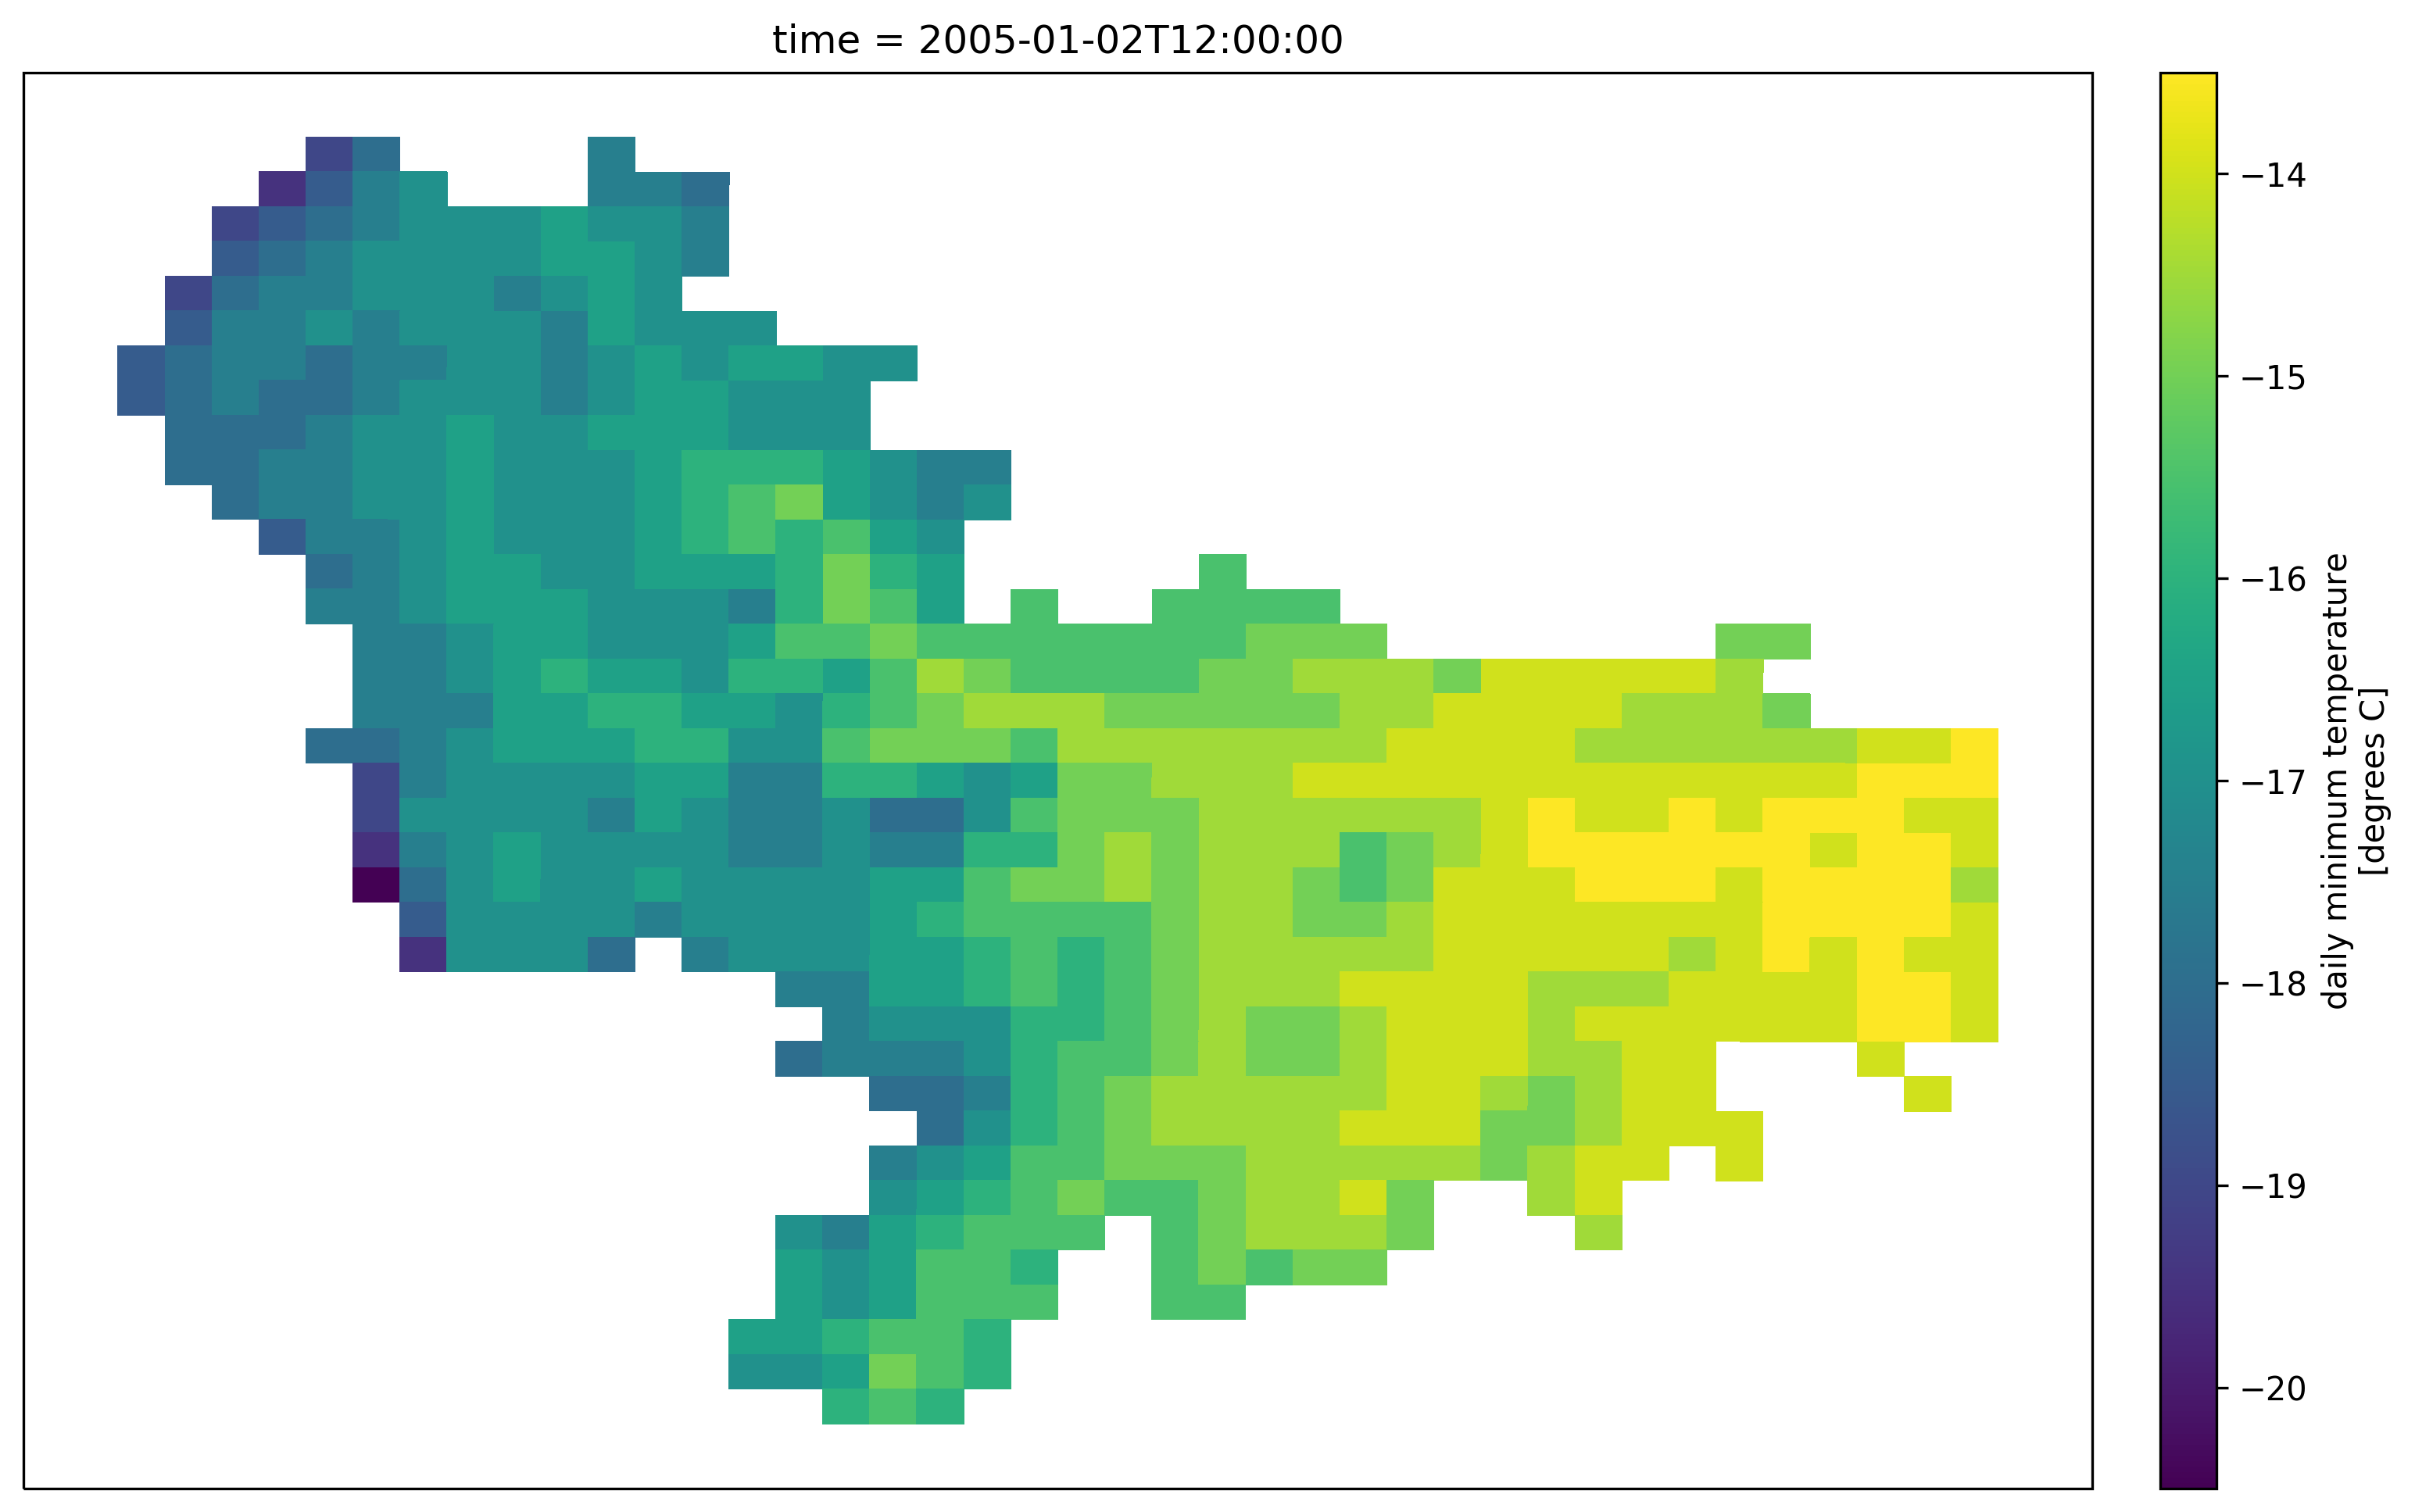

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig=plt.figure()
# Daymet data projection
lcc = ccrs.LambertConformal(standard_parallels=(25, 60), central_longitude=-100, central_latitude=42.5)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.figure.set_size_inches(12,8)
cax = fig.add_axes([ax.get_position().x1+0.14, ax.get_position().y0, 0.02, ax.get_position().height])
clm_grd.isel(time=1).tmin.plot(ax=ax, transform=lcc, cbar_kwargs={"cax":cax})
ax.figure.savefig('readme_temp.png', bbox_to_inch='tight', dpi=300)

In [9]:
stations = wshed.watershed.get_stations()
stations_upto_150 = wshed.watershed.get_stations(navigation="upstreamMain", distance=150)

[ID: 01031500] Downloading all the stations upstream tributaries from NLDI >>> finsihed.
[ID: 01031500] Downloading stations within 150 km of upstream main from NLDI >>> finsihed.


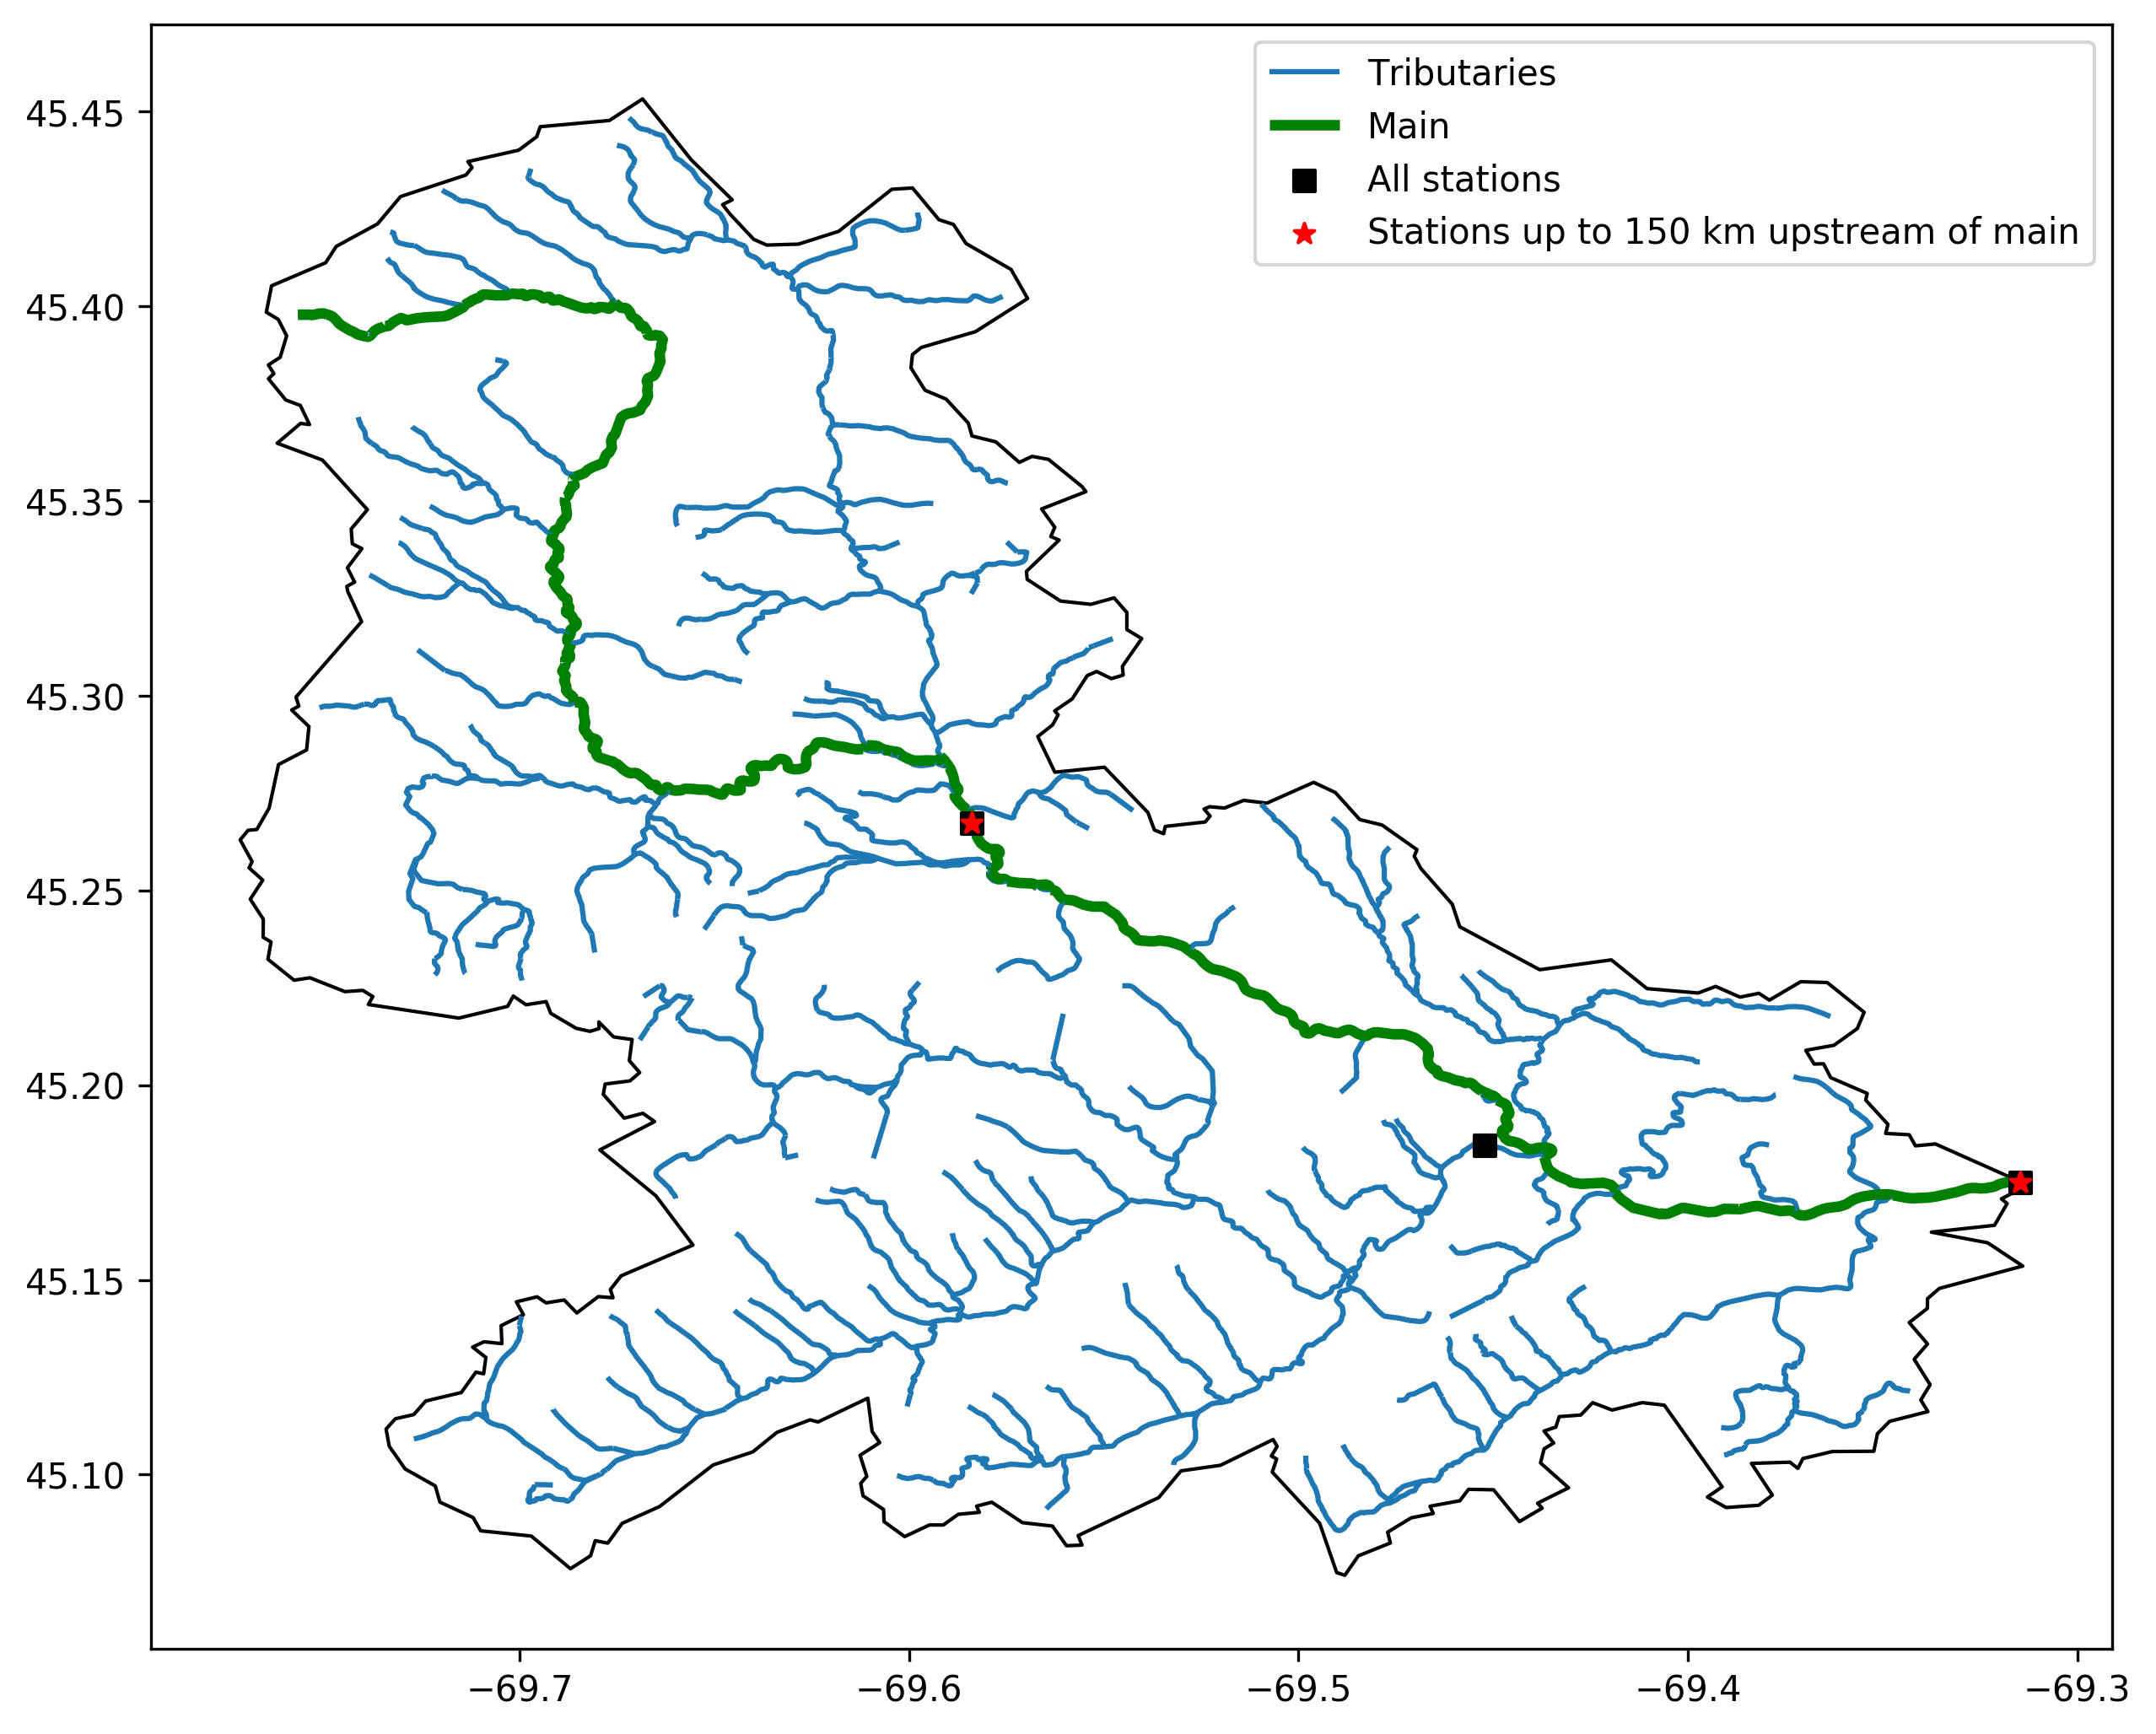

In [10]:
ax = wshed.watershed.basin.plot(color='white', edgecolor='black', zorder=1, figsize = (10, 10))
wshed.tributaries.plot(ax=ax, label='Tributaries', zorder=2)
wshed.main_channel.plot(ax=ax, color='green', lw=3, label='Main', zorder=3)
stations.plot(ax=ax, color='black', label='All stations', marker='s', zorder=4)
stations_upto_150.plot(ax=ax, color='red', label='Stations up to 150 km upstream of main', marker='*', zorder=5)
ax.legend(loc='best');
ax.figure.savefig('readme_basin.png', bbox_to_inch='tight', dpi=300)

In [11]:
from hydrodata.datasets import ssebopeta_bygeom

eta_grd = ssebopeta_bygeom(wshed.geometry, start='2005-01-01', end='2005-01-31')

[CNT: (-69.58, 45.24)] Staging actual ET data from SSEBop:
31 files have already been downloaded.
[CNT: (-69.58, 45.24)] Proccessing the 31 downloaded file for the requested region >>> finished.


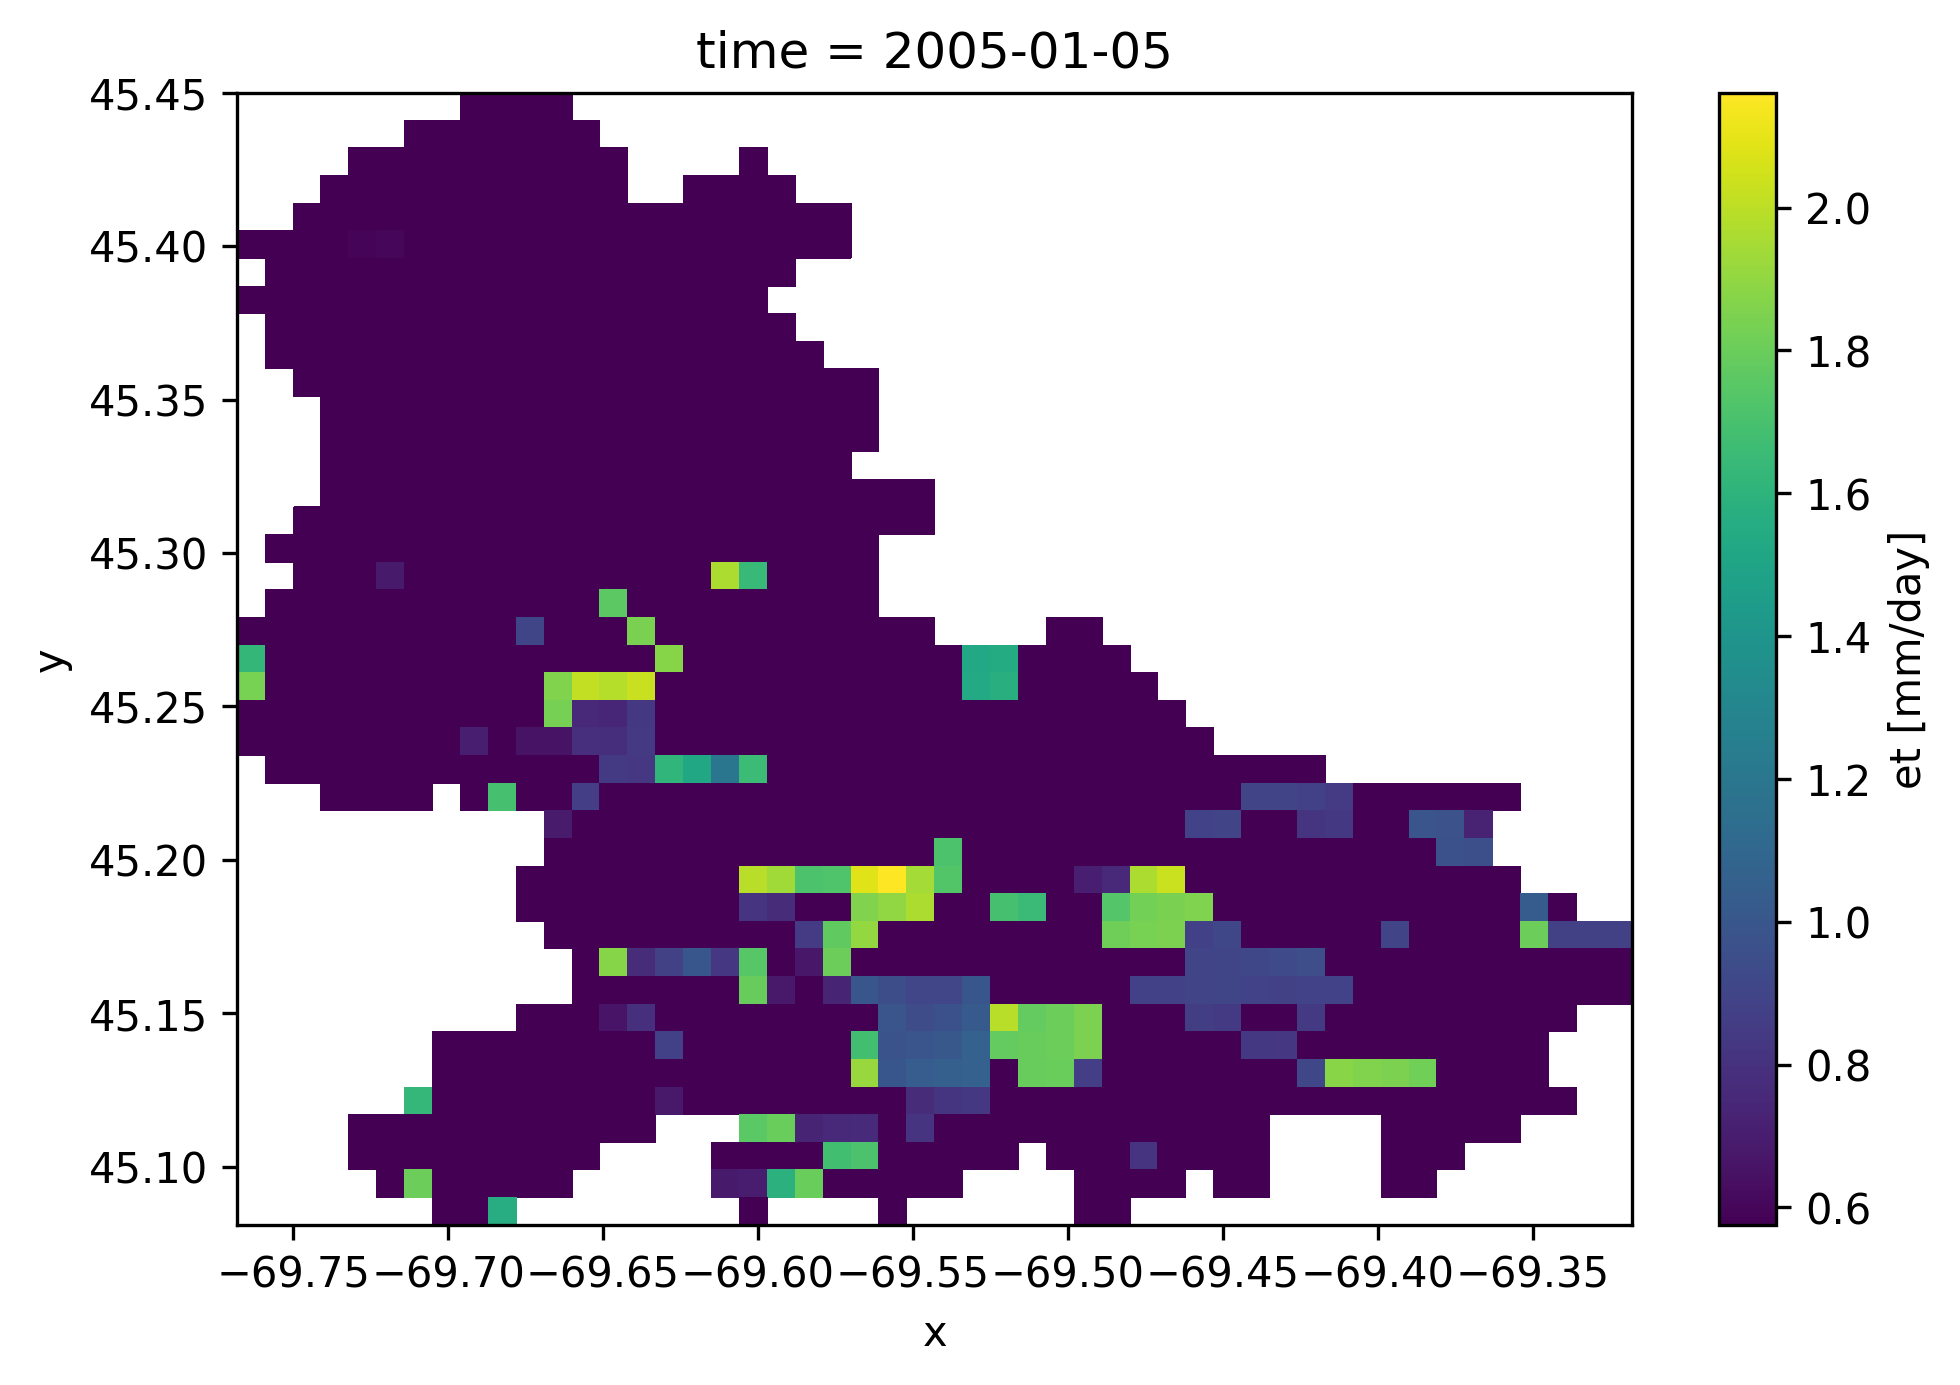

In [12]:
ax = eta_grd.isel(time=4).et.plot(size=5)
ax.figure.savefig('readme_et.png', bbox_to_inch='tight', dpi=300)

In [13]:
stats = hds.NLCD(wshed.geometry, data_dir="data")

[CNT: (-69.58, 45.24)] Connecting to MRLC Web Map Service >>> connected.
[CNT: (-69.58, 45.24)] Downloading canopy data from NLCD 2016 database >>> finished.
[CNT: (-69.58, 45.24)] Downloading cover data from NLCD 2016 database >>> finished.
[CNT: (-69.58, 45.24)] Downloading impervious data from NLCD 2016 database >>> finished.


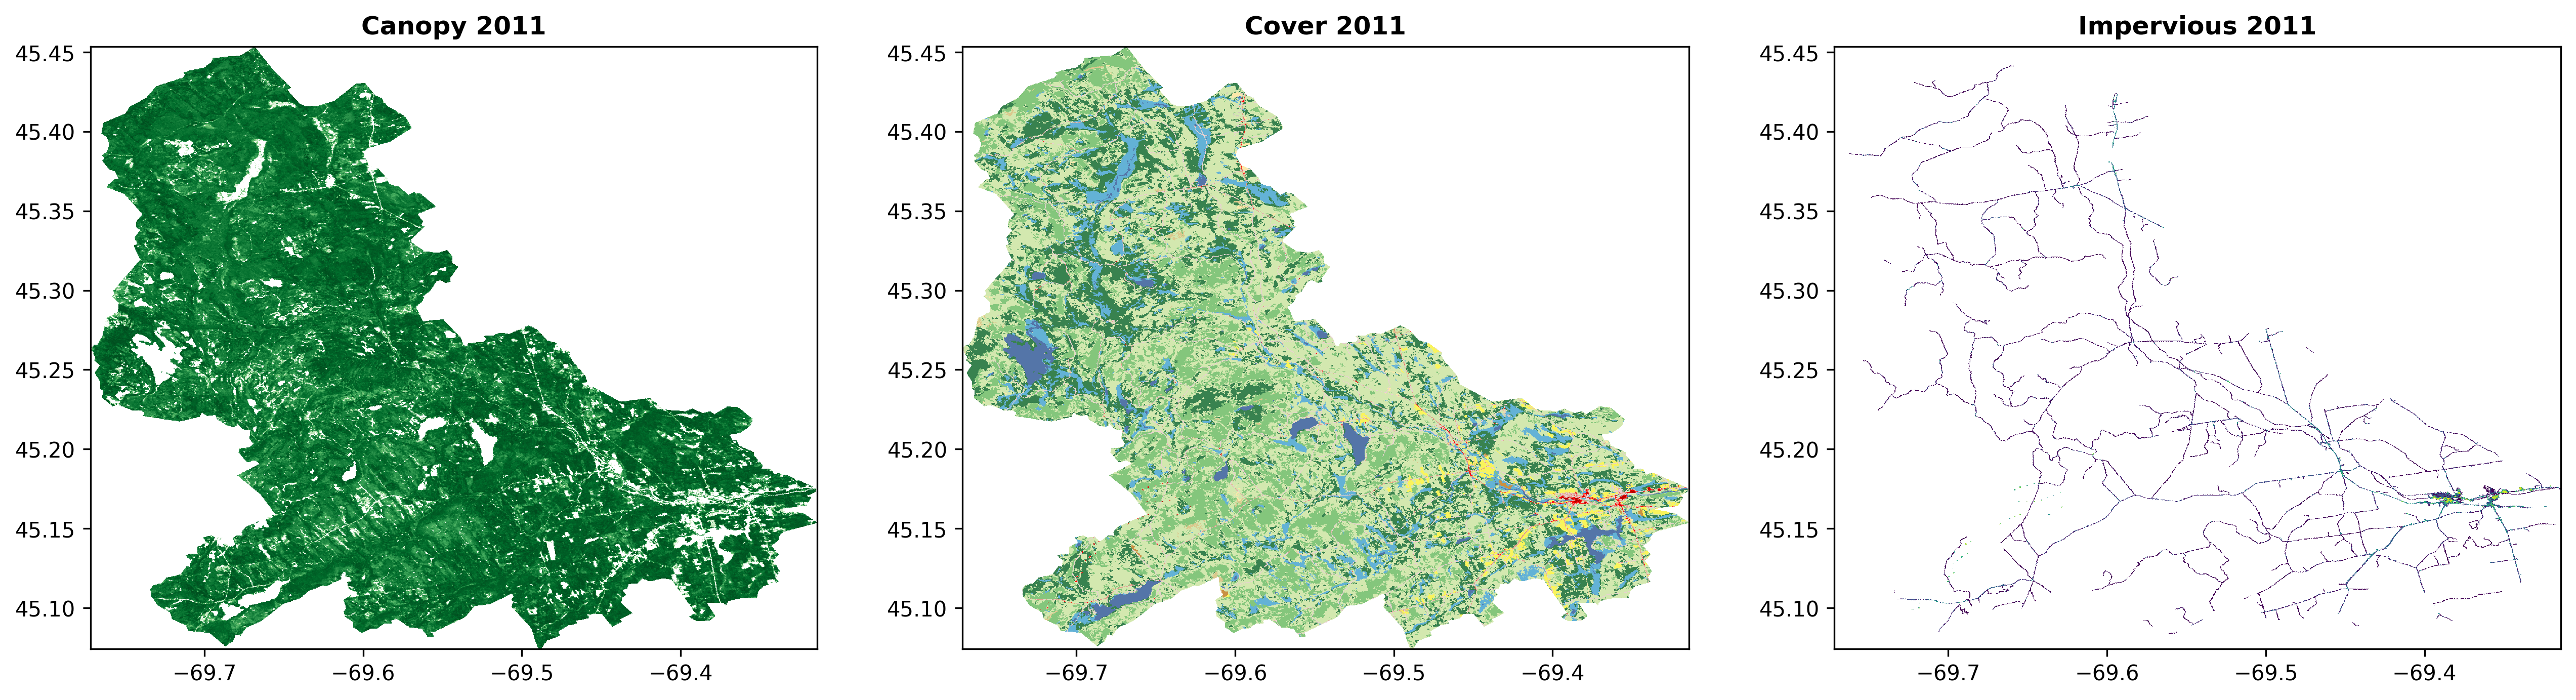

In [14]:
import rasterio
from rasterio.plot import show

cmap, norm = plot.cover_lenegeds()

rs = [rasterio.open(f'data/{d}_2016.geotiff') for d in ['canopy', 'cover', 'impervious']]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7), dpi=300)
show(rs[0], ax=ax1, title=f'Canopy 2011', cmap='Greens')
show(rs[1], ax=ax2, title=f'Cover 2011', cmap=cmap, norm=norm)
show(rs[2], ax=ax3, title=f'Impervious 2011');

with multiprocess: 102.17063426971436

with ThreadPoolExecutor: 54.129507064819336

with ProcessPoolExecutor: 78.2123670578003